In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm

In [2]:
#loading the dataset
file_path = r"D:\Exploratory Data Analysis\Data\football_matches_2024_2025.csv"
df = pd.read_csv(file_path)
df.head()

,competition_code,competition_name,season,match_id,matchday,stage,status,date_utc,referee,home_team_id,...,fulltime_home,fulltime_away,halftime_home,halftime_away,goal_difference,total_goals,match_outcome,home_points,away_points,date_local_africa_cairo
0,PL,Premier League,2024/2025,497410,1,REGULAR_SEASON,FINISHED,2024-08-16 19:00:00+00:00,Robert Jones,66,...,1,0,0.0,0.0,1,1,Home Win,3,0,2024-08-16 22:00
1,PL,Premier League,2024/2025,497411,1,REGULAR_SEASON,FINISHED,2024-08-17 11:30:00+00:00,Tim Robinson,349,...,0,2,0.0,0.0,-2,2,Away Win,0,3,2024-08-17 14:30
2,PL,Premier League,2024/2025,497412,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Jarred Gillett,57,...,2,0,1.0,0.0,2,2,Home Win,3,0,2024-08-17 17:00
3,PL,Premier League,2024/2025,497413,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Simon Hooper,62,...,0,3,0.0,1.0,-3,3,Away Win,0,3,2024-08-17 17:00
4,PL,Premier League,2024/2025,497414,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Craig Pawson,67,...,1,0,1.0,0.0,1,1,Home Win,3,0,2024-08-17 17:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   competition_code         1941 non-null   object 
 1   competition_name         1941 non-null   object 
 2   season                   1941 non-null   object 
 3   match_id                 1941 non-null   int64  
 4   matchday                 1941 non-null   int64  
 5   stage                    1941 non-null   object 
 6   status                   1941 non-null   object 
 7   date_utc                 1941 non-null   object 
 8   referee                  1938 non-null   object 
 9   home_team_id             1941 non-null   int64  
 10  home_team                1941 non-null   object 
 11  away_team_id             1941 non-null   int64  
 12  away_team                1941 non-null   object 
 13  fulltime_home            1941 non-null   int64  
 14  fulltime_away           

In [4]:
df.shape

(1941, 23)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()


competition_code           0
competition_name           0
season                     0
match_id                   0
matchday                   0
stage                      0
status                     0
date_utc                   0
referee                    3
home_team_id               0
home_team                  0
away_team_id               0
away_team                  0
fulltime_home              0
fulltime_away              0
halftime_home              1
halftime_away              1
goal_difference            0
total_goals                0
match_outcome              0
home_points                0
away_points                0
date_local_africa_cairo    0
dtype: int64

In [7]:
#Handling missing values
df['referee'].fillna("Unknown", inplace=True)
df['halftime_home'].fillna(0, inplace=True)
df['halftime_away'].fillna(0, inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\2530628755.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['referee'].fillna("Unknown", inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\2530628755.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [8]:
#Converting data type of date_utc and date_local_africa_cairo to datetime
df['date_utc'] = pd.to_datetime(df['date_utc'])
df['date_local_africa_cairo'] = pd.to_datetime(df['date_local_africa_cairo'])


In [9]:
df.describe()

,match_id,matchday,home_team_id,away_team_id,fulltime_home,fulltime_away,halftime_home,halftime_away,goal_difference,total_goals,home_points,away_points,date_local_africa_cairo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941
mean,502366.762494,17.338485,483.205564,482.991242,1.535806,1.340031,0.699639,0.588357,0.195775,2.875837,1.524472,1.236991,2025-01-06 07:54:55.208655360
min,497410.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,2024-08-15 20:00:00
25%,498056.000000,7.000000,67.000000,67.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,2.000000,0.000000,0.000000,2024-10-27 19:00:00
50%,498897.000000,17.000000,109.000000,109.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,2025-01-11 19:30:00
75%,503126.000000,27.000000,522.000000,522.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,2025-03-14 21:30:00
max,524120.000000,38.000000,7509.000000,7509.000000,9.000000,7.000000,6.000000,5.000000,8.000000,11.000000,3.000000,3.000000,2025-05-31 22:00:00
std,7461.271565,11.056850,1170.086272,1170.116895,1.322829,1.205567,0.860319,0.790438,1.880667,1.693997,1.331631,1.305615,NaN


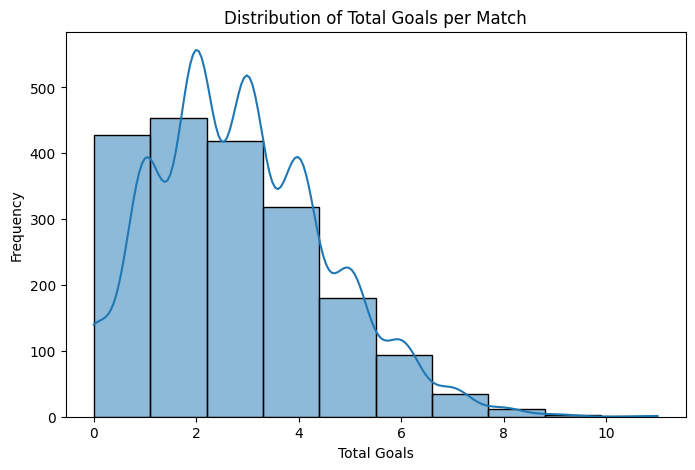

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_goals'], bins=10, kde=True)
plt.title("Distribution of Total Goals per Match")
plt.xlabel("Total Goals")
plt.ylabel("Frequency")
plt.show()

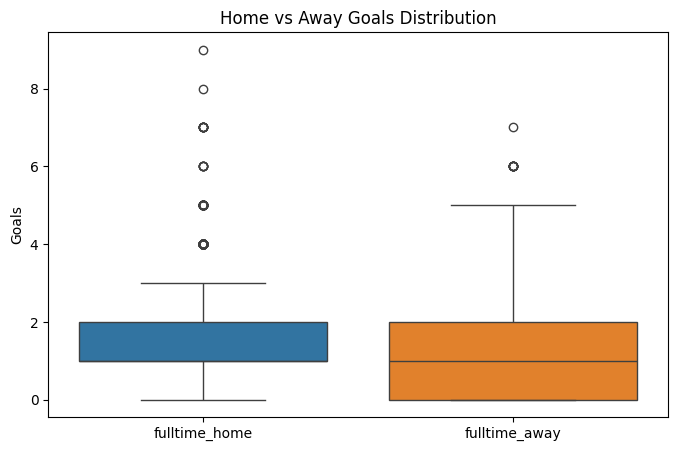

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['fulltime_home', 'fulltime_away']])
plt.title("Home vs Away Goals Distribution")
plt.ylabel("Goals")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\4233252535.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='match_outcome', palette='pastel')


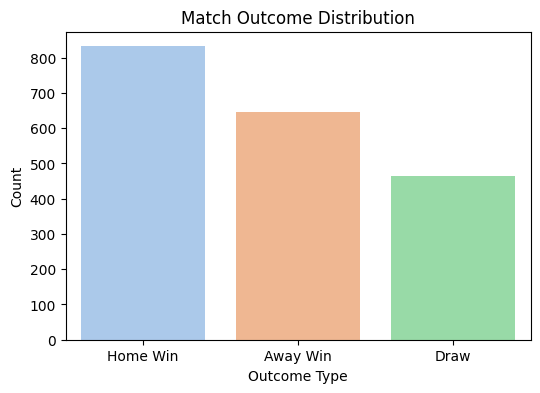

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='match_outcome', palette='pastel')
plt.title("Match Outcome Distribution")
plt.xlabel("Outcome Type")
plt.ylabel("Count")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24264\3417563661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_refs.values, y=top_refs.index, palette='mako')


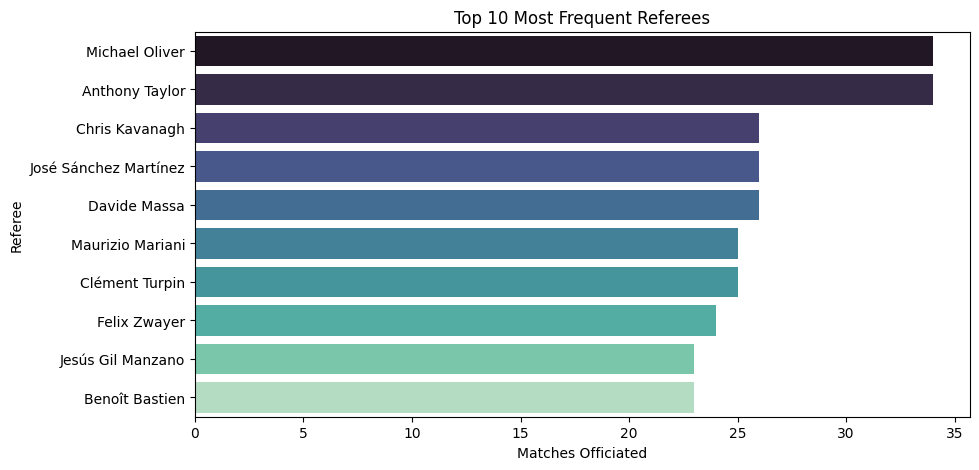

In [13]:
top_refs = df['referee'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_refs.values, y=top_refs.index, palette='mako')
plt.title("Top 10 Most Frequent Referees")
plt.xlabel("Matches Officiated")
plt.ylabel("Referee")
plt.show()


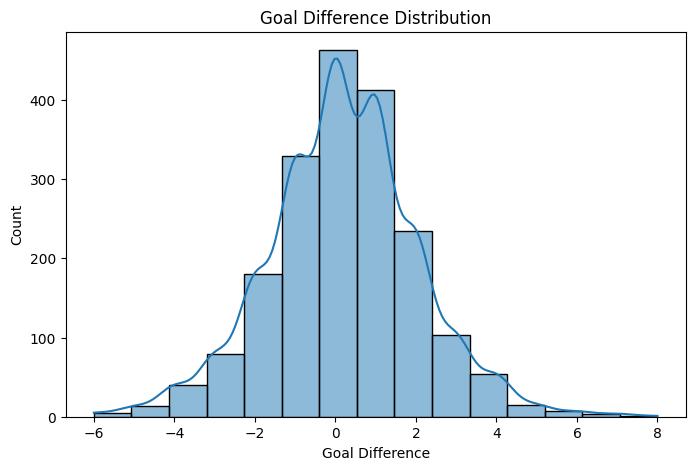

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['goal_difference'], bins=15, kde=True)
plt.title("Goal Difference Distribution")
plt.xlabel("Goal Difference")
plt.show()


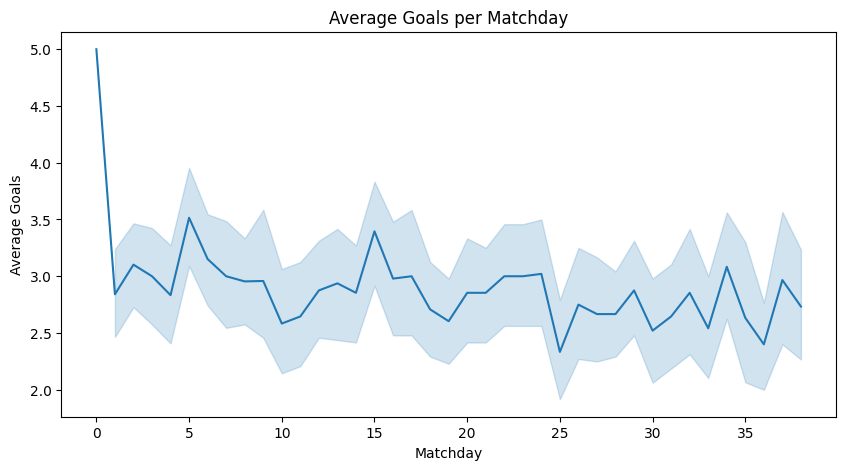

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x='matchday', y='total_goals', data=df, estimator='mean')
plt.title("Average Goals per Matchday")
plt.xlabel("Matchday")
plt.ylabel("Average Goals")
plt.show()


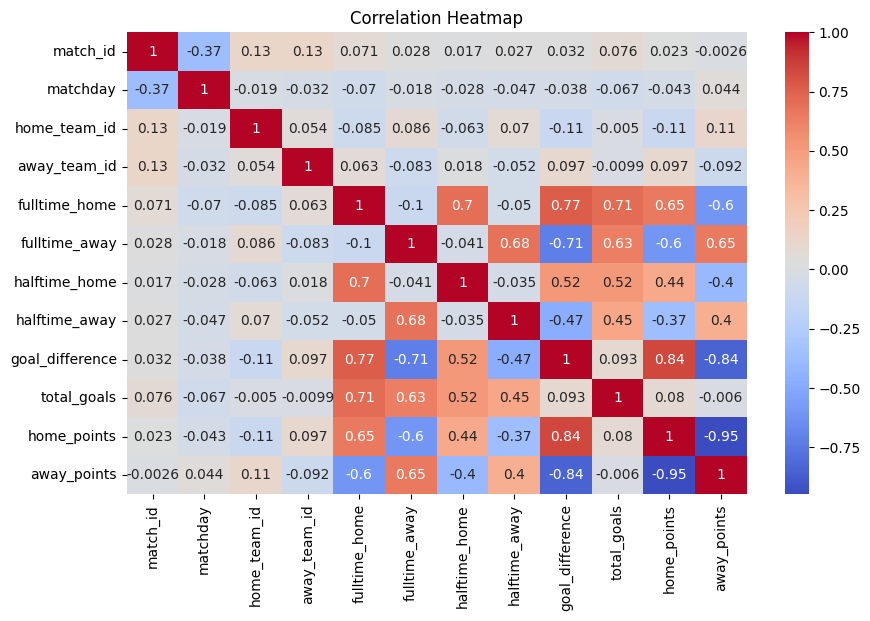

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
